# 1 feature Selection dropping constant features

In [83]:
import pandas as pd

In [84]:
data=pd.DataFrame({'A':[1,2,3,4,5,6],'B':[1,2,4,6,8,10],'C':[1,1,1,1,1,1],'D':[0,0,0,0,0,0]})
data

,A,B,C,D
0,1,1,1,0
1,2,2,1,0
2,3,4,1,0
3,4,6,1,0
4,5,8,1,0
5,6,10,1,0


In [85]:
# variance threshold
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(data)

VarianceThreshold()

In [86]:
var_thres.get_support()

array([ True,  True, False, False])

In [7]:
data.columns[var_thres.get_support()]

Index(['A', 'B'], dtype='object')

In [8]:
constant_columns=[column for column in data.columns if column not in data.columns[var_thres.get_support()]]

In [9]:
constant_columns

['C', 'D']

In [12]:
data.drop(constant_columns,axis=1,inplace=True)

In [13]:
data

,A,B
0,1,1
1,2,2
2,3,4
3,4,6
4,5,8
5,6,10


In [88]:
# data=pd.read_csv('https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv')
# data.head()

# 2 Feature selection with correlation

In [15]:
from sklearn.datasets import load_boston
data=load_boston()

C:\Users\amara\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

In [17]:
dir(data)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [25]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df['MEDV']=data.target

In [26]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [30]:
x=df.drop('MEDV',axis=1)
y=df['MEDV']

In [32]:
x.head()
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [37]:
# separate the dataset into train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [38]:
x_train.shape


(354, 13)

In [39]:
y_train.shape

(354,)

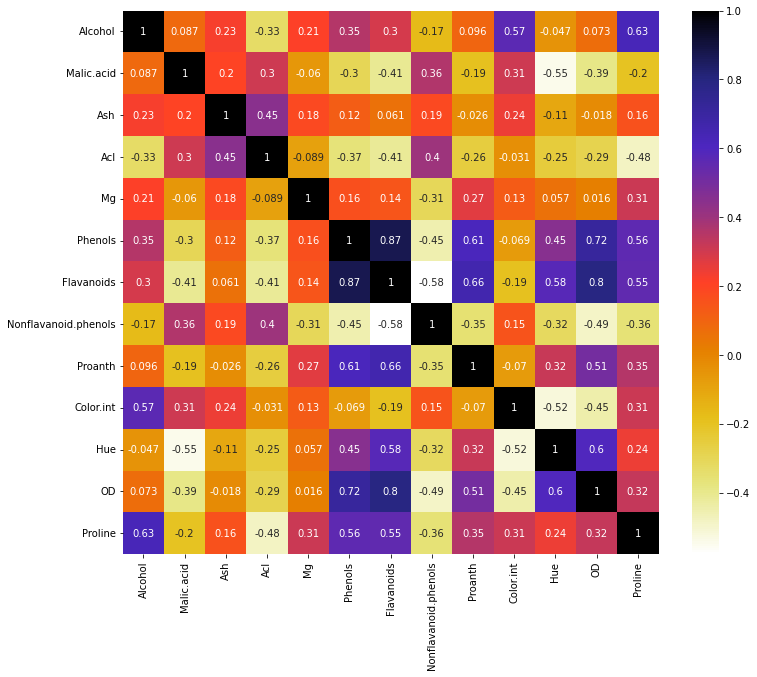

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(x_train.corr(),annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [92]:
# with the following function we can select the highly correlated features
# it will remove the first features that is correlated with anything other feature
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr            

In [93]:
corr_features=correlation(x_train,0.8)
len(set(corr_features))

1

In [94]:
corr_features

{'Flavanoids'}

In [95]:
x_train=x_train.drop(corr_features,axis=1)
x_train.shape

(124, 12)

# Mutual information gain

In [ ]:
# I(X:Y)=H(X)-H(X/Y)
#H(X/Y) --> Conditional entropy of x wrt y

In [99]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')

In [100]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [101]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [103]:
# to avoid overfitting we will use train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(labels=['Wine'],axis=1),df['Wine'],test_size=0.3,random_state=0)

In [104]:
x_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


In [105]:
from sklearn.feature_selection import mutual_info_classif
# to determine the mutual information
mutual_info=mutual_info_classif(x_train,y_train)

In [106]:
mutual_info

array([0.42835691, 0.29321162, 0.18339272, 0.24751711, 0.16486362,
       0.46958325, 0.7247821 , 0.11994944, 0.26627921, 0.62117083,
       0.56612144, 0.54490807, 0.54151677])

In [107]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns

In [108]:
mutual_info.sort_values(ascending=False)

Flavanoids              0.724782
Color.int               0.621171
Hue                     0.566121
OD                      0.544908
Proline                 0.541517
Phenols                 0.469583
Alcohol                 0.428357
Malic.acid              0.293212
Proanth                 0.266279
Acl                     0.247517
Ash                     0.183393
Mg                      0.164864
Nonflavanoid.phenols    0.119949
dtype: float64

<AxesSubplot: >

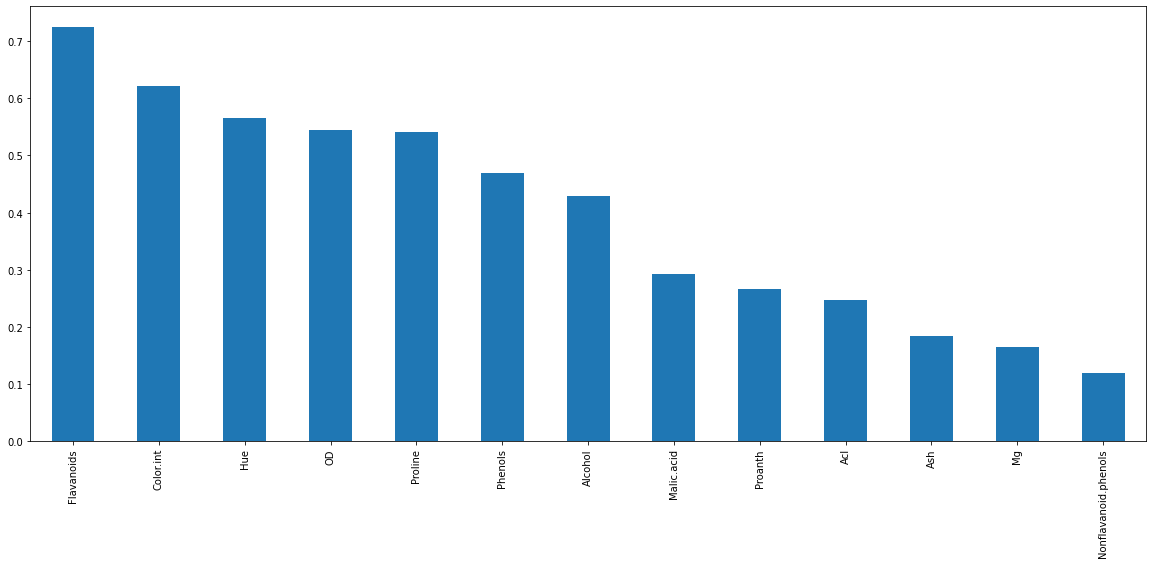

In [109]:
# lets plot the orderd mutual info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [81]:
# now we will select the top five features
from sklearn.feature_selection import SelectKBest
sel_five_cols=SelectKBest(mutual_info_classif,k=5)
sel_five_cols.fit(x_train,y_train)
x_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

# mutual information works on information gain


In [110]:
data=pd.read_csv(r'D:\Datasets\houseprice\train.csv')

In [111]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [112]:
numeric_list=['int16','int32','int64','float16','float32','float64']
numeric_columns=list(data.select_dtypes(include=numeric_list).columns)

In [115]:
housing_df=data[numeric_columns]

In [117]:
housing_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [118]:
housing_df=housing_df.drop('Id',axis=1)

In [121]:
# splitting train test split to avoid overfitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(housing_df.drop(labels=['SalePrice'],axis=1),housing_df['SalePrice'],test_size=0.3,random_state=0)

In [124]:
x_train.isnull().sum()

MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [125]:
from sklearn.feature_selection import mutual_info_regression
mutual_info_reg=mutual_info_regression(x_train.fillna(0),y_train)

In [129]:
mutual_info_reg=pd.Series(mutual_info_reg)
mutual_info_reg.index=x_train.columns

In [130]:
mutual_info_reg.sort_values(ascending=False)

OverallQual      0.545848
GrLivArea        0.481009
TotalBsmtSF      0.387335
GarageCars       0.384919
GarageArea       0.368227
YearBuilt        0.361890
1stFlrSF         0.311835
GarageYrBlt      0.266644
MSSubClass       0.252295
YearRemodAdd     0.244393
FullBath         0.238703
2ndFlrSF         0.231232
LotFrontage      0.216365
Fireplaces       0.189234
TotRmsAbvGrd     0.185409
OpenPorchSF      0.164491
LotArea          0.163695
BsmtFinSF1       0.158930
BsmtUnfSF        0.112699
OverallCond      0.097652
MasVnrArea       0.097583
HalfBath         0.067698
WoodDeckSF       0.067269
BedroomAbvGr     0.040191
BsmtFullBath     0.021279
YrSold           0.011880
EnclosedPorch    0.010168
ScreenPorch      0.007771
3SsnPorch        0.004147
KitchenAbvGr     0.001012
BsmtFinSF2       0.000582
PoolArea         0.000426
BsmtHalfBath     0.000000
LowQualFinSF     0.000000
MiscVal          0.000000
MoSold           0.000000
dtype: float64

<AxesSubplot: >

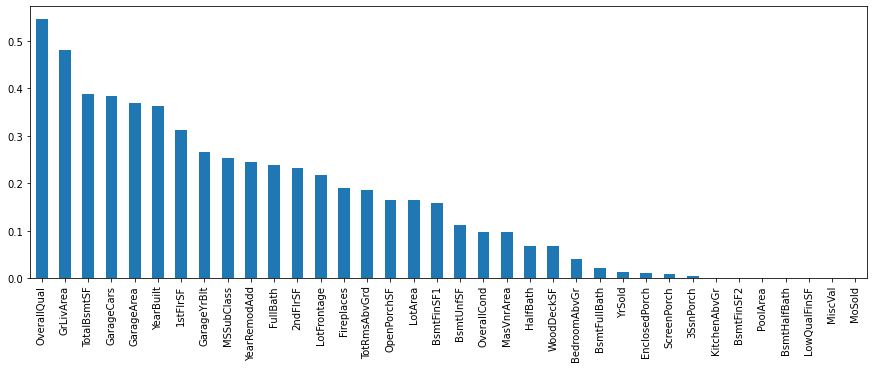

In [131]:
mutual_info_reg.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [135]:
# selecting the top 20% of the features
from sklearn.feature_selection import SelectPercentile
sel_top_cols=SelectPercentile(mutual_info_regression,percentile=20)
sel_top_cols.fit(x_train.fillna(0),y_train)
x_train.columns[sel_top_cols.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

# 4 Chi2 test

In [152]:
import seaborn as sns
df=sns.load_dataset('titanic')

In [154]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [155]:
# categorical features ['Sex','embarked','class','survived']
df=df[['sex','embarked','alone','class','survived']]

In [156]:
df.head()

,sex,embarked,alone,class,survived
0,male,S,False,Third,0
1,female,C,False,First,1
2,female,S,True,Third,1
3,female,S,False,First,1
4,male,S,True,Third,0


In [157]:
# lets perform label encoding on sex column
import numpy as np
df['sex']=np.where(df['sex']=='male',1,0)



In [158]:
df

,sex,embarked,alone,class,survived
0,1,S,False,Third,0
1,0,C,False,First,1
2,0,S,True,Third,1
3,0,S,False,First,1
4,1,S,True,Third,0
...,...,...,...,...,...
886,1,S,True,Second,0
887,0,S,True,First,1
888,0,S,False,Third,0
889,1,C,True,First,1


In [159]:
# lets perform label encoding on embarked column
ordinal_label={k:i for i,k in enumerate(df['embarked'].unique(),0)}
df['embarked']=df['embarked'].map(ordinal_label)

In [160]:
df

,sex,embarked,alone,class,survived
0,1,0,False,Third,0
1,0,1,False,First,1
2,0,0,True,Third,1
3,0,0,False,First,1
4,1,0,True,Third,0
...,...,...,...,...,...
886,1,0,True,Second,0
887,0,0,True,First,1
888,0,0,False,Third,0
889,1,1,True,First,1


In [161]:
df['alone']=np.where(df['alone']==True,1,0)

In [162]:
df

,sex,embarked,alone,class,survived
0,1,0,0,Third,0
1,0,1,0,First,1
2,0,0,1,Third,1
3,0,0,0,First,1
4,1,0,1,Third,0
...,...,...,...,...,...
886,1,0,1,Second,0
887,0,0,1,First,1
888,0,0,0,Third,0
889,1,1,1,First,1


In [164]:
df['class']=df['class'].map({'Third':3,'First':1,'Second':2})
df['class'].unique()

[3, 1, 2]
Categories (3, int64): [1, 2, 3]

In [165]:
df

,sex,embarked,alone,class,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0
...,...,...,...,...,...
886,1,0,1,2,0
887,0,0,1,1,1
888,0,0,0,3,0
889,1,1,1,1,1


In [186]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('survived',axis=1),df['survived'],test_size=0.3,random_state=100)

In [187]:
x_train.isnull().sum()

sex         0
embarked    0
alone       0
class       0
dtype: int64

In [188]:
#chi2 return the two values 
# one is f score and another is p value
from sklearn.feature_selection import chi2
f_pvalues=chi2(x_train,y_train)
f_pvalues

(array([65.67929505,  7.55053653, 10.88471585, 21.97994154]),
 array([5.30603805e-16, 5.99922095e-03, 9.69610546e-04, 2.75514881e-06]))

In [189]:
p_values=pd.Series(f_pvalues[1])

In [191]:
p_values.index=x_train.columns
p_values.sort_index(ascending=True)
# the p value is less the feature is having high importance

alone       9.696105e-04
class       2.755149e-06
embarked    5.999221e-03
sex         5.306038e-16
dtype: float64

# feature selection techniques

In [192]:
df=pd.read_csv('D:\Datasets\mobile_dataset.csv')

In [193]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# univariate selection


In [195]:
x=df.drop('price_range',axis=1)
y=df['price_range']

In [196]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [197]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [205]:
from sklearn.feature_selection import SelectKBest,chi2
ord_ran_feat=SelectKBest(chi2,k=20)
order_features=ord_ran_feat.fit(x,y)

In [210]:
feat_rank=pd.DataFrame(order_features.scores_,columns=['score'],index=[x.columns])

In [213]:
feat_rank.nlargest(10,'score')

,score
ram,931267.519053
px_height,17363.569536
battery_power,14129.866576
px_width,9810.586750
mobile_wt,95.972863
int_memory,89.839124
sc_w,16.480319
talk_time,13.236400
fc,10.135166
sc_h,9.614878


In [216]:
# feature importance
# this technique gives you the score for each feature of your data the higher the score more relevant it is
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [217]:
print(model.feature_importances_)

[0.0619519  0.02022403 0.03324536 0.02039318 0.03326527 0.01772577
 0.03549997 0.03326774 0.03589487 0.03345575 0.03377374 0.04653519
 0.04817941 0.39218346 0.03253269 0.03421653 0.03487467 0.01396702
 0.01885511 0.01995834]


In [218]:
ranked_features=pd.Series(model.feature_importances_,index=x.columns)

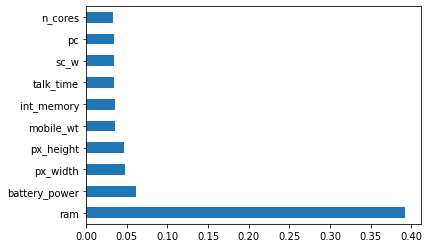

In [221]:
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

# correlation

<AxesSubplot: >

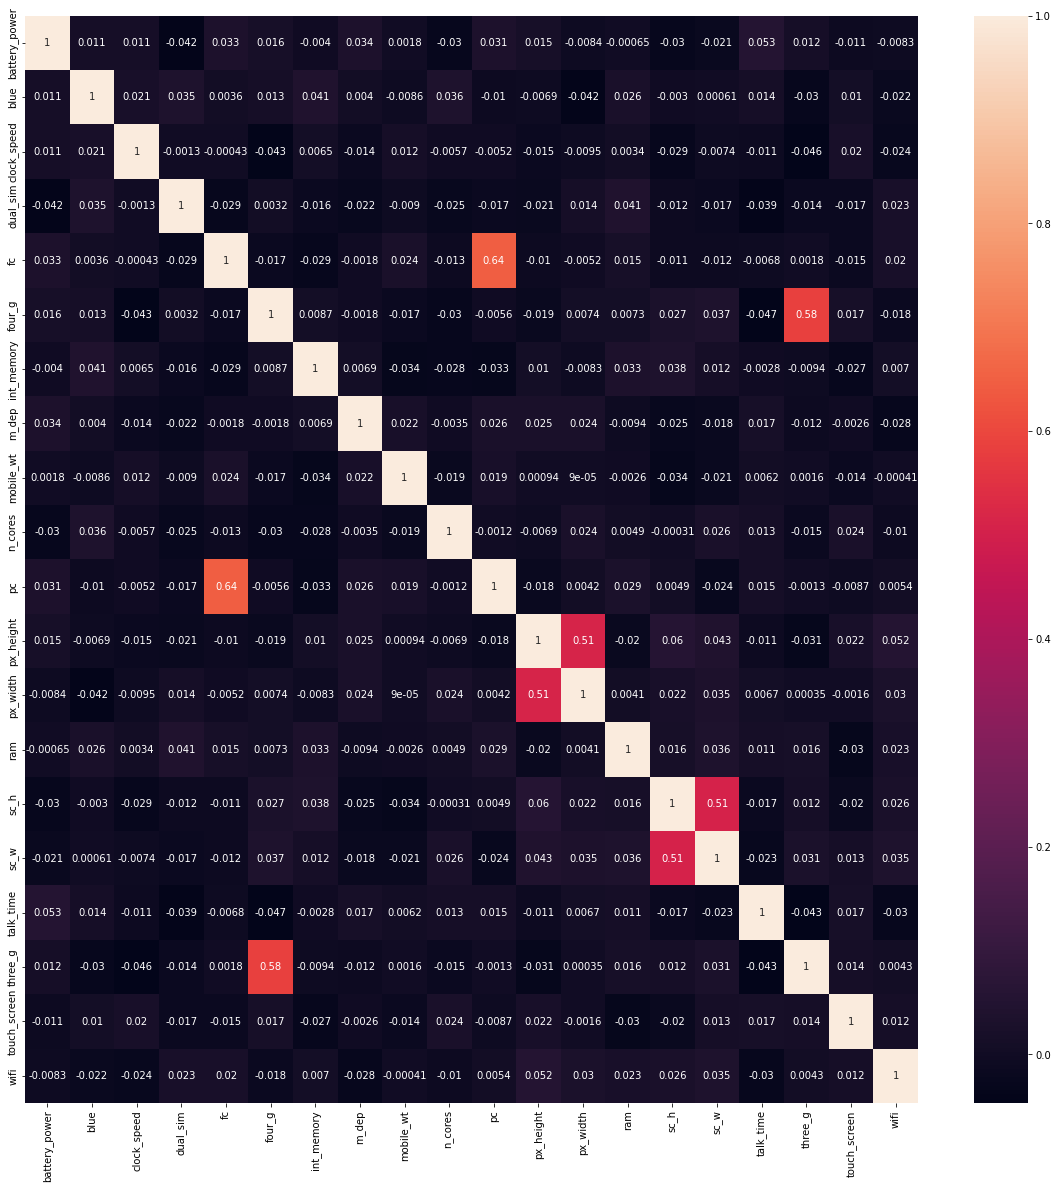

In [236]:
import seaborn as sns
corr=df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)


In [231]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr 

In [238]:
correlation(df.iloc[:,:-1],0.5)

{'pc', 'px_width', 'sc_w', 'three_g'}

# information gain

In [240]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x,y)
mutual_data=pd.Series(mutual_info,index=x.columns)

In [242]:
mutual_data.sort_values(ascending=False)


ram              0.849099
battery_power    0.029999
px_width         0.028373
px_height        0.026242
dual_sim         0.021892
blue             0.017776
mobile_wt        0.016306
pc               0.015019
sc_h             0.011512
four_g           0.011388
fc               0.010538
sc_w             0.007179
touch_screen     0.004976
three_g          0.002358
wifi             0.000913
m_dep            0.000000
n_cores          0.000000
int_memory       0.000000
clock_speed      0.000000
talk_time        0.000000
dtype: float64